In [12]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [13]:
from qiskit_aer.noise import NoiseModel,depolarizing_error

In [14]:
qc=QuantumCircuit(3,3)

In [15]:
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure([0,1,2],[0,1,2])

In [16]:
noise_model = NoiseModel()

In [17]:
# Add depolarizing noise for single-qubit gates and two-qubit gates
depol_1q = depolarizing_error(0.01, 1)
depol_2q = depolarizing_error(0.02, 2)
noise_model.add_all_qubit_quantum_error(depol_1q, ['u3', 'x', 'h'])
noise_model.add_all_qubit_quantum_error(depol_2q, ['cx'])

In [18]:
backend = AerSimulator()

In [19]:
result_with_noise = backend.run(qc,noise_model=noise_model, shots=1024).result()

In [20]:
noisy_counts = result_with_noise.get_counts(qc)

In [21]:
mitigated_counts = {key: noisy_counts[key] * (1 - 0.02) for key in noisy_counts}

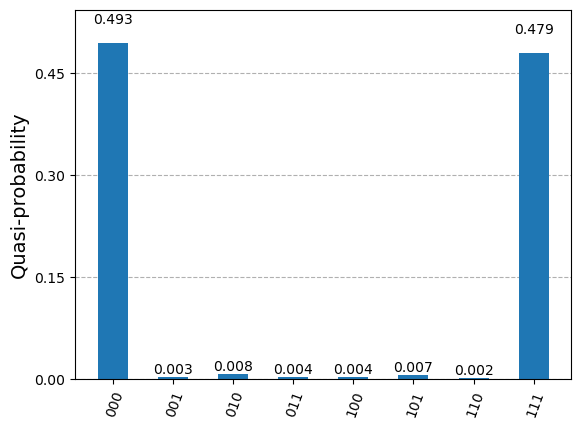

In [22]:
plot_histogram(mitigated_counts)

In [23]:
print("Original counts:")
print(noisy_counts)

Original counts:
{'001': 3, '110': 2, '100': 4, '011': 4, '111': 491, '101': 7, '010': 8, '000': 505}


In [24]:
print("Mitigated counts:")
print(mitigated_counts)

Mitigated counts:
{'001': 2.94, '110': 1.96, '100': 3.92, '011': 3.92, '111': 481.18, '101': 6.859999999999999, '010': 7.84, '000': 494.9}


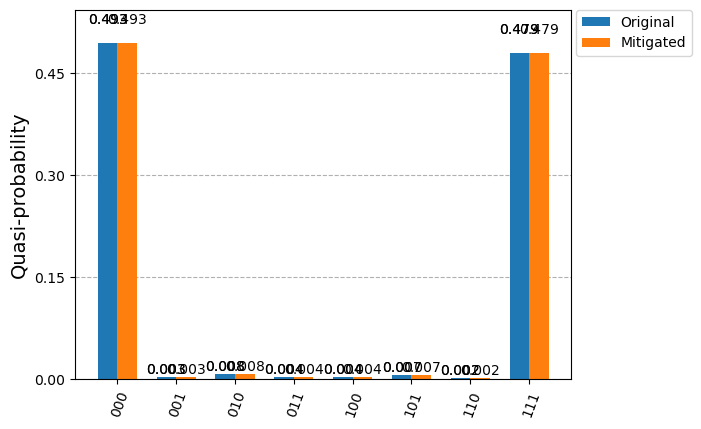

In [25]:
plot_histogram([noisy_counts, mitigated_counts], legend=['Original', 'Mitigated'])